**Módulo 9: Redes Neuronales para Series Temporales**

- **Conceptos clave**:
  - Introducción a redes neuronales recurrentes (RNN) y su aplicación en series temporales.
  - Redes LSTM (Long Short-Term Memory) y su capacidad para capturar dependencias a largo plazo.
  - Uso de redes neuronales en predicción a largo plazo y técnicas de regularización.
    
- **Proyecto**: Implementar un modelo LSTM.
  - Usar LSTM para predecir el valor futuro de una serie temporal financiera o de demanda de productos. Evaluar la efectividad del modelo comparado con métodos tradicionales.

<H1>Marco Teórico</H1>

### Marco Teórico: LSTM para Predicción de Series Temporales Financieras

El objetivo de este proyecto es implementar un modelo de redes neuronales LSTM (Long Short-Term Memory) para predecir valores futuros de una serie temporal financiera, como el precio de cierre de una acción. A continuación, se describe el marco teórico y las ecuaciones que subyacen en la metodología implementada.

### **1. Descarga de Datos Históricos**

#### **Fuente: `yfinance`**

El primer paso es obtener datos históricos de precios de una acción. Utilizamos `yfinance`, una API de Python que permite acceder a datos financieros históricos de Yahoo Finance. Extraemos el **precio de cierre** de la acción, que se empleará como serie temporal para la predicción.

- La serie temporal puede representarse matemáticamente como:
  $
  \{P(t)\}_{t=1}^{T} = \{P(1), P(2), \dots, P(T)\}
  $
  donde $P(t)$ es el precio de cierre en el día $t$, y $T$ es el número total de días en el rango de fechas seleccionado.

---

### **2. Preprocesamiento de los Datos**

El preprocesamiento de los datos es crucial para preparar la serie temporal antes de pasarla al modelo de red neuronal. Este paso incluye la normalización de los datos y la creación de secuencias de entrenamiento.

#### **2.1 Normalización de los Datos**

Para mejorar el desempeño de las redes neuronales, los datos deben estar en una escala uniforme. Usamos la **normalización Min-Max**, que reescala los valores de los datos para que estén en el rango $[0,1]$.

La ecuación de la normalización Min-Max es:
$
P'(t) = \frac{P(t) - P_{min}}{P_{max} - P_{min}}
$
donde:
- $P(t)$ es el precio original en el tiempo $t$,
- $P_{min}$ es el valor mínimo de la serie temporal,
- $P_{max}$ es el valor máximo de la serie temporal,
- $P'(t)$ es el valor normalizado.

El propósito de esta transformación es evitar problemas que podrían surgir debido a diferentes escalas en los datos, lo que podría afectar el proceso de aprendizaje de la red neuronal.

#### **2.2 Creación de Secuencias de Entrenamiento**

El modelo LSTM necesita procesar secuencias temporales, por lo que debemos transformar la serie de precios en un formato que le permita aprender patrones temporales. Este paso implica crear **ventanas de tiempo deslizantes**, lo que consiste en crear secuencias de valores de la serie temporal, donde cada secuencia se utiliza como entrada para el modelo, y el siguiente valor en el tiempo es la etiqueta a predecir.

##### **Definición del Problema**

Dada una secuencia de precios $ \{P'(t-n), P'(t-n+1), ..., P'(t-1)\} $, queremos predecir el valor del precio en el tiempo $t$, es decir, $P'(t)$. Esto crea una relación entrada-salida, donde los datos de entrenamiento se generan utilizando una ventana de $n$ días de precios anteriores.

Matemáticamente, para cada instante $t$, tenemos:
- Entrada: $X(t)$, donde:
  $
  X(t) = \{P'(t-n), P'(t-n+1), ..., P'(t-1)\}
  $
  Esta entrada es una secuencia de longitud $n$, que en este caso podría ser de 60 días.
  
- Salida: $y(t)$, que es el valor a predecir:
  $
  y(t) = P'(t)
  $
  Es decir, el valor de la serie en el instante siguiente al último valor de la secuencia.

##### **Generación de Datos de Entrenamiento y Prueba**

Para generar las secuencias de entrenamiento, recorremos la serie temporal con una ventana deslizante de longitud fija $n$. Cada ventana nos da un conjunto de datos de entrada $X(t)$ y un valor de salida $y(t)$. 

Si tenemos un conjunto de datos con $T$ observaciones, entonces el número total de secuencias posibles será $T - n$, porque cada secuencia utiliza $n$ datos de entrada y se predice el $n+1$-ésimo dato.

Esto se representa así:
- Para la primera ventana:
  $
  X(1) = \{P'(1), P'(2), \dots, P'(60)\}, \quad y(1) = P'(61)
  $
- Para la segunda ventana:
  $
  X(2) = \{P'(2), P'(3), \dots, P'(61)\}, \quad y(2) = P'(62)
  $
- Y así sucesivamente hasta $T - n$.

##### **Consideraciones de Estabilidad Temporal**

En series temporales financieras, es crucial que el modelo aprenda patrones estables a largo plazo. La longitud de la ventana $n$ afecta el comportamiento del modelo, ya que una ventana demasiado corta puede llevar a predicciones inexactas, mientras que una ventana demasiado larga puede incluir ruido no relevante. Elegir un valor adecuado para $n$ es una decisión basada en la naturaleza de los datos y las pruebas experimentales.

---

### **3. Modelo LSTM**

#### **3.1 Redes Neuronales Recurrentes (RNN)**

Una **red neuronal recurrente** (RNN) es una clase de redes neuronales diseñada para procesar secuencias de datos. A diferencia de las redes feedforward, las RNN tienen conexiones que permiten a la red recordar información anterior, manteniendo una **memoria temporal**.

El **estado oculto** de una RNN es clave para su funcionamiento, ya que almacena información de secuencias previas. Matemáticamente, el estado oculto en el tiempo $t$, denotado como $h_t$, se calcula de la siguiente forma:
$
h_t = \sigma(W_h h_{t-1} + W_x x_t + b_h)
$
donde:
- $h_t$ es el estado oculto en el tiempo $t$,
- $x_t$ es la entrada en el tiempo $t$,
- $W_h$ es la matriz de pesos para el estado oculto anterior $h_{t-1}$,
- $W_x$ es la matriz de pesos para la entrada $x_t$,
- $b_h$ es el sesgo,
- $\sigma$ es una función de activación, generalmente la tangente hiperbólica $\tanh$ o la función sigmoide.

El problema que enfrentan las RNN estándar es la dificultad para aprender dependencias a largo plazo debido al **desvanecimiento del gradiente**, lo que significa que los gradientes que se retropropagan a través del tiempo se vuelven muy pequeños y la red no puede aprender eficientemente sobre secuencias largas.

#### **3.2 LSTM (Long Short-Term Memory)**

El modelo **LSTM** fue introducido para resolver el problema del desvanecimiento del gradiente. Las unidades LSTM están diseñadas para recordar información durante períodos más largos utilizando **celdas de memoria** y varios mecanismos de **puertas** que controlan el flujo de información.

Cada unidad LSTM tiene las siguientes componentes clave:

1. **Puerta de Olvido $f_t$:**

   La puerta de olvido decide qué parte de la información pasada debe ser "olvidada" o eliminada. Esta puerta genera un valor entre 0 y 1, donde 0 significa olvidar completamente la información y 1 significa retenerla completamente.
   $
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $
   donde:
   - $h_{t-1}$ es el estado oculto anterior,
   - $x_t$ es la entrada en el tiempo \(t\),
   - $W_f$ es la matriz de pesos de la puerta de olvido,
   - $b_f$ es el sesgo,
   - $\sigma$ es la función sigmoide, que asegura que $f_t$ esté en el rango [0, 1].

2. **Puerta de Entrada $i_t$:**

   La puerta de entrada decide qué parte de la nueva información será almacenada en la celda de memoria. También utiliza una función sigmoide para determinar cuánto de la información nueva se incorporará.
   $
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $
   
   Luego, se crea un **vector candidato** para actualizar la celda de memoria, denotado como $\tilde{C}_t$:
   $
   \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
   $
   donde $\tanh$ es la tangente hiperbólica, que genera valores en el rango [-1, 1].

3. **Actualización de la Celda de Memoria $C_t$:**

   La celda de memoria $C_t$ es el núcleo de la unidad LSTM. Se actualiza combinando la información antigua (controlada por la puerta de olvido) y la nueva información (controlada por la puerta de entrada).
   $
   C_t = f_t * C_{t-1} + i_t * \tilde{C}_t
   $

4. **Puerta de Salida $o_t$:**

   Finalmente, la puerta de salida controla la salida del estado oculto $h_t$ y decide qué parte de la celda de memoria será utilizada para generar la salida.
   $
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $
   El estado oculto en el tiempo $t$ se actualiza utilizando la celda de memoria actual y la puerta de salida:
   $
   h_t = o_t * \tanh(C_t)
   $

---

### **4. Evaluación del Modelo**

Para evaluar el rendimiento del modelo LSTM, utilizamos la métrica de **error cuadrático medio (MSE)**, que mide la diferencia entre los valores reales y los predichos por el modelo:
$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$
donde $N$ es el número de puntos de datos, $y_i$ son los valores reales y $\hat{y}_i$ son los valores predichos.

Otra métrica común es la **raíz del error cuadrático medio (RMSE)**, que es simplemente la raíz cuadrada del MSE:
$
RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}
$

--- 

Este marco teórico proporciona los fundamentos para implementar y evaluar un modelo LSTM en series temporales financieras.

<H1>Proyecto</H1>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

2024-09-23 09:42:38.573478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 09:42:40.277203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 09:42:40.615367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 09:42:43.251406: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 09:43:01.453670: W tensorflow/compiler/tf2

In [2]:
# 1. Descargar datos de una acción usando yfinance
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']  # Usaremos el precio de cierre

In [3]:
# 2. Preprocesar los datos (normalización y creación de secuencias para el LSTM)
def preprocess_data(data, time_steps=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

    X, y = [], []
    for i in range(time_steps, len(scaled_data)):
        X.append(scaled_data[i - time_steps:i, 0])
        y.append(scaled_data[i, 0])

    return np.array(X), np.array(y), scaler

In [4]:
# 3. Crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(input_shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Predicción de un solo valor (precio futuro)
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [5]:
# 4. Entrenar el modelo
def train_model(model, X_train, y_train, epochs=20, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    return history

In [6]:
# 5. Evaluar el modelo y hacer predicciones
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return predictions, y_test, rmse

In [7]:
# 6. Visualizar los resultados
def plot_results(predictions, y_test):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, color='blue', label='Actual Price')
    plt.plot(predictions, color='red', label='Predicted Price')
    plt.title('Actual vs Predicted Price')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed
/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0060 - val_loss: 0.0066
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 4.8643e-04 - val_loss: 0.0012
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.9852e-04 - val_loss: 0.0011
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 3.3633e-04 - val_loss: 0.0010
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.9860e-04 - val_loss: 0.0011
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.5471e-04 - val_loss: 0.0017
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.0767e-04 - val_loss: 0.0048
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 3.6625e-04 - val_loss: 0.0038
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.1268e-04 - val_loss: 0.0013
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.2099e-04 - val_loss: 0.0016
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 1.8159e-04 - val_loss: 0.0036
Epoch 12/50
40/40 ━━━━━

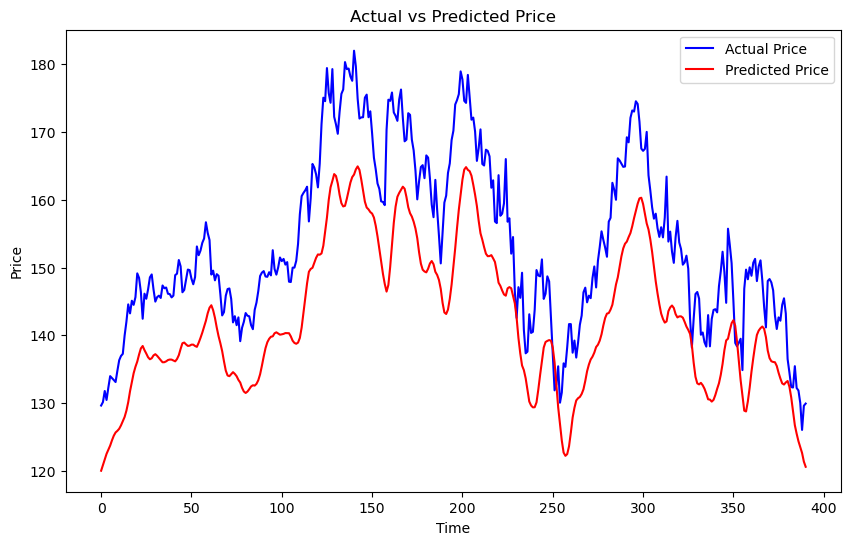

In [8]:
# 7. Pipeline completo del proyecto
if __name__ == "__main__":
    # Definir parámetros
    ticker = 'AAPL'  # Acción de Apple
    start_date = '2015-01-01'
    end_date = '2023-01-01'
    time_steps = 60

    # Descargar y procesar los datos
    stock_data = download_stock_data(ticker, start_date, end_date)
    X, y, scaler = preprocess_data(stock_data, time_steps)

    # Dividir en conjunto de entrenamiento y prueba (80% - 20%)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Redimensionar X para ser compatible con LSTM (samples, time_steps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Crear y entrenar el modelo LSTM
    model = create_lstm_model(X_train.shape)
    history = train_model(model, X_train, y_train, epochs=50)

    # Evaluar el modelo
    predictions, y_test, rmse = evaluate_model(model, X_test, y_test, scaler)
    print(f'Root Mean Squared Error: {rmse}')

    # Graficar los resultados
    plot_results(predictions, y_test)